In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd

train = pd.read_csv("train.csv")

In [0]:
scaled_data5 = pd.read_excel("scaled_data_with_dummies.xlsx")

In [6]:
scaled_data5.head()

,Unnamed: 0,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,weekend,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [0]:
time_meter =  scaled_data5[['timestamp', 'meter_reading']]

In [10]:
date_tmp = pd.to_datetime(scaled_data5['timestamp'])
date_tmp2 = date_tmp.dt.strftime("%Y-%m-%d")
date_tmp2.head()

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
Name: timestamp, dtype: object

In [11]:
time_meter['day'] = date_tmp2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
time_meter.head()

,timestamp,meter_reading,day
0,2016-01-01 00:00:00,0.221033,2016-01-01
1,2016-01-01 01:00:00,0.220558,2016-01-01
2,2016-01-01 02:00:00,0.224972,2016-01-01
3,2016-01-01 03:00:00,0.233563,2016-01-01
4,2016-01-01 04:00:00,0.239860,2016-01-01


In [0]:
day_sum = time_meter.groupby('day').sum()

In [15]:
day_sum.head()

,meter_reading
day,
2016-01-01,5.448452
2016-01-02,5.847376
2016-01-03,5.678398
2016-01-04,6.896524
2016-01-05,6.765495


In [0]:
day_sum = day_sum.reset_index()

In [18]:
day_sum.head()

,day,meter_reading
0,2016-01-01,5.448452
1,2016-01-02,5.847376
2,2016-01-03,5.678398
3,2016-01-04,6.896524
4,2016-01-05,6.765495


In [0]:
mer = time_meter.merge(day_sum, how='outer', on='day')

In [24]:
mer.head()

,timestamp,meter_reading_x,day,meter_reading_y
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452


In [0]:
mer['portion'] = mer['meter_reading_x']/mer['meter_reading_y']

In [28]:
mer.head()

,timestamp,meter_reading_x,day,meter_reading_y,portion
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


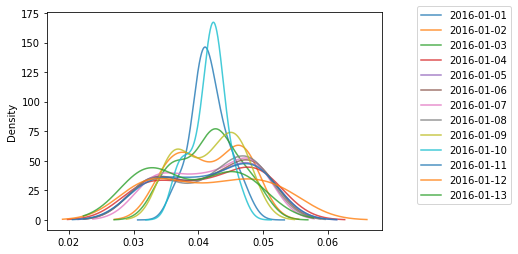

In [54]:
mer.iloc[:300,:].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.4, 1.05))



In [0]:
date_tmp3 = date_tmp.dt.strftime("%H")

In [59]:
date_tmp3.head()

0    00
1    01
2    02
3    03
4    04
Name: timestamp, dtype: object

In [0]:
mer['hour'] = date_tmp3

In [61]:
mer.head()

,timestamp,meter_reading_x,day,meter_reading_y,portion,hour
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568,00
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481,01
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291,02
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868,03
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023,04


In [0]:
mer = mer.rename(columns= { 'meter_reading_y' :'day_sum_meter_reading'})

In [65]:
mer.head()

,timestamp,meter_reading_x,day,day_sum_meter_reading,portion,hour
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568,00
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481,01
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291,02
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868,03
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023,04


In [0]:
mer['day_of_week'] = date_tmp.dt.strftime("%A")

In [68]:
mer.head()

,timestamp,meter_reading_x,day,day_sum_meter_reading,portion,hour,day_of_week
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568,00,Friday
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481,01,Friday
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291,02,Friday
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868,03,Friday
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023,04,Friday


In [73]:
set(mer['day_of_week'])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [138]:
mer[mer['day_of_week']=='Friday'][:100]

,timestamp,meter_reading_x,day,day_sum_meter_reading,portion,hour,day_of_week,colors
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568,00,Friday,red
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481,01,Friday,red
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291,02,Friday,red
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868,03,Friday,red
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023,04,Friday,red
...,...,...,...,...,...,...,...,...
527,2016-01-22 23:00:00,0.234197,2016-01-22,7.811222,0.029982,23,Friday,red
672,2016-01-29 00:00:00,0.225613,2016-01-29,7.540473,0.029920,00,Friday,red
673,2016-01-29 01:00:00,0.219196,2016-01-29,7.540473,0.029069,01,Friday,red
674,2016-01-29 02:00:00,0.217651,2016-01-29,7.540473,0.028864,02,Friday,red


In [151]:
np.arange(1,41)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

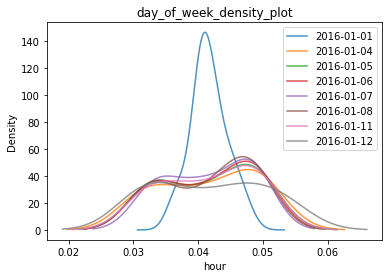

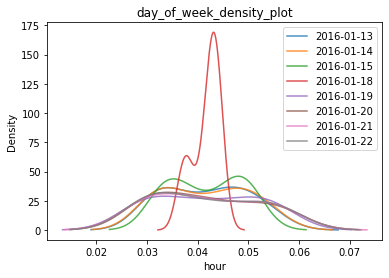

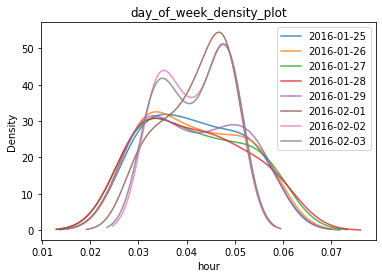

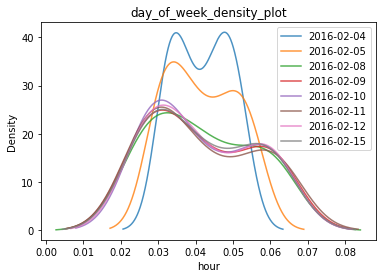

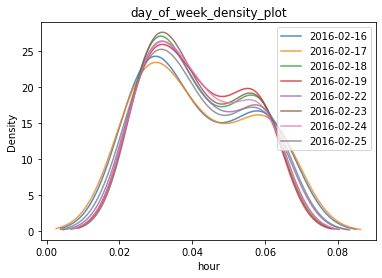

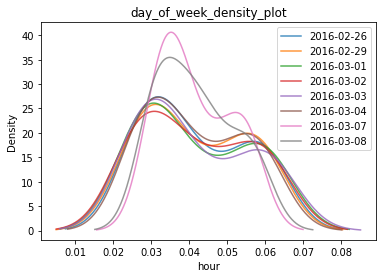

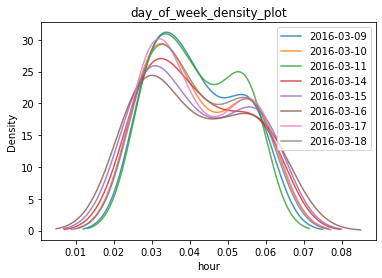

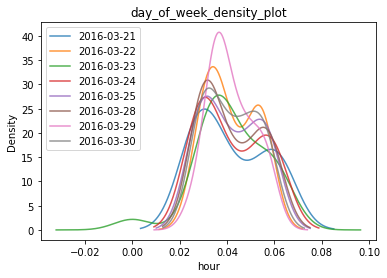

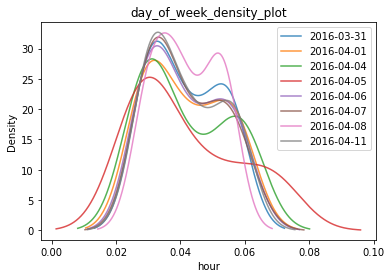

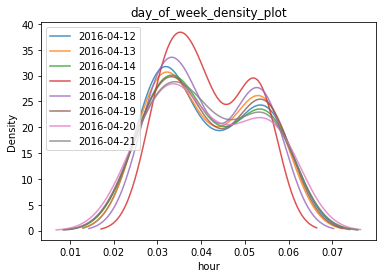

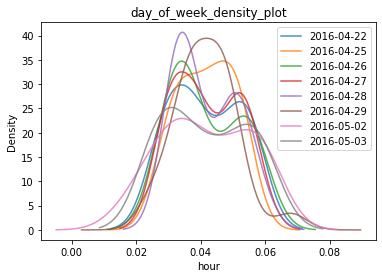

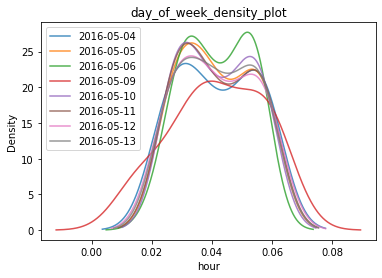

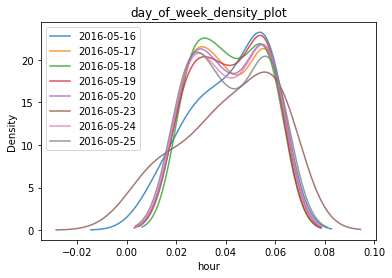

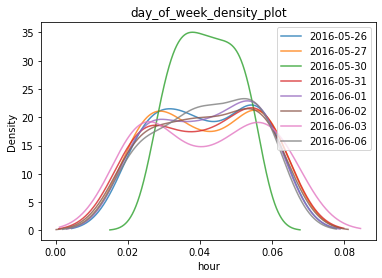

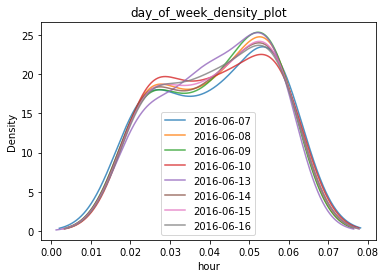

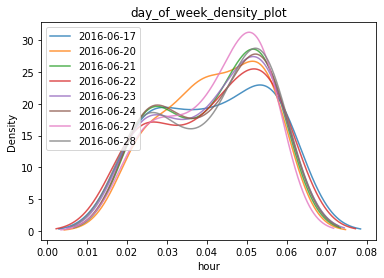

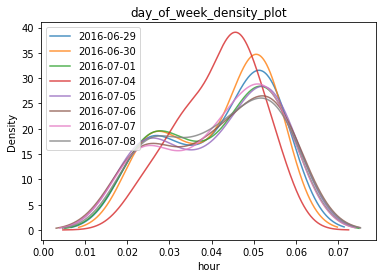

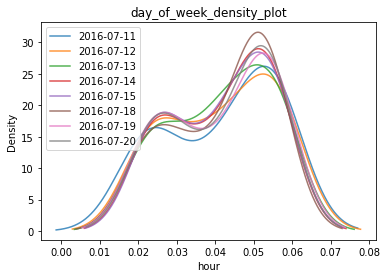

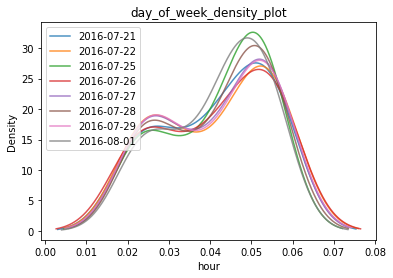

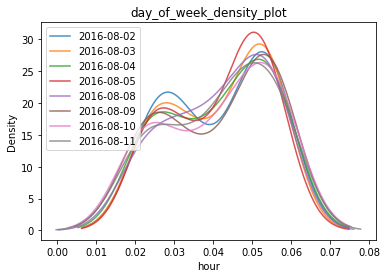

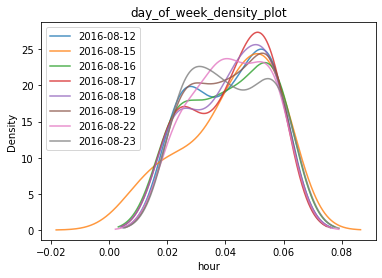

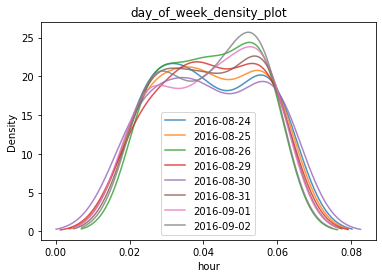

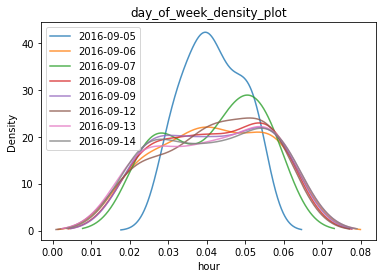

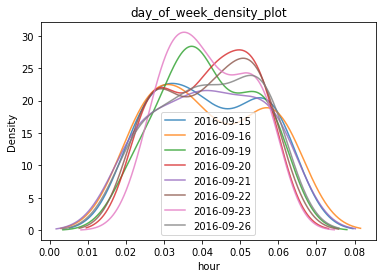

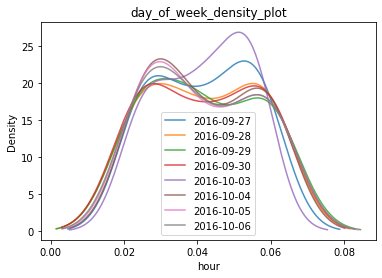

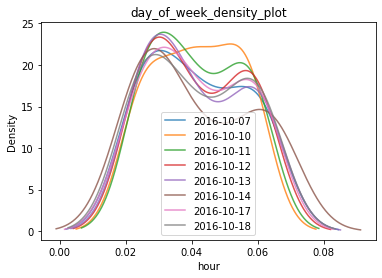

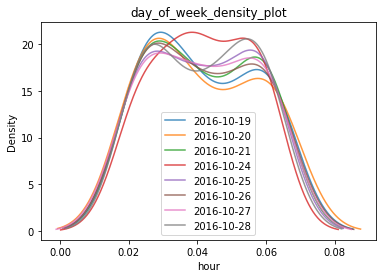

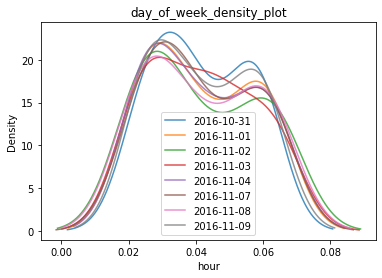

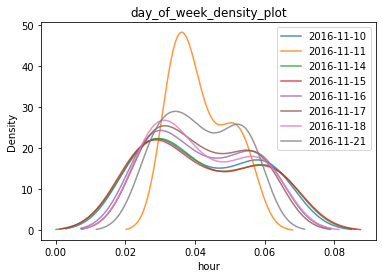

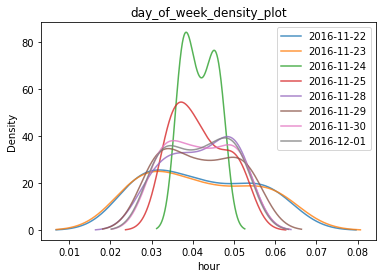

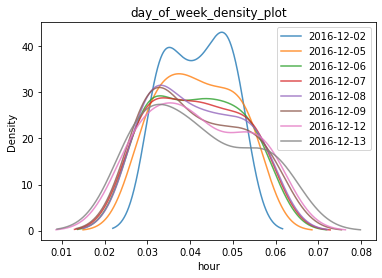

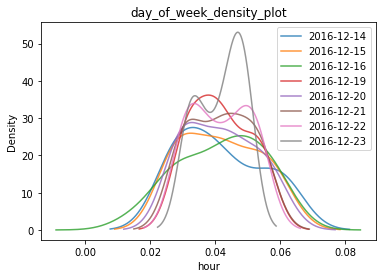

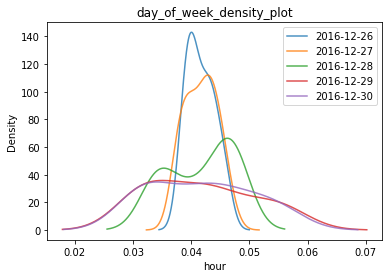

In [163]:
for i in np.arange(1,34) : 
        plt.title("day_of_week_density_plot")
        plt.xlabel("hour")       
        mer[(mer['day_of_week'] !='Saturday') & (mer['day_of_week'] !='Sunday')][192*(i-1):192 *i].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
        plt.show()

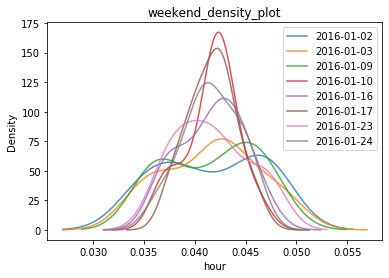

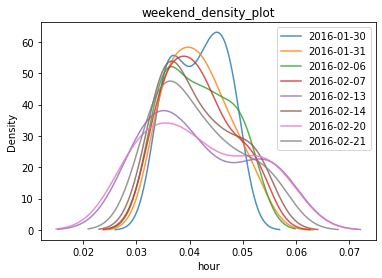

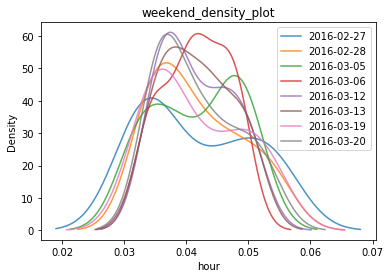

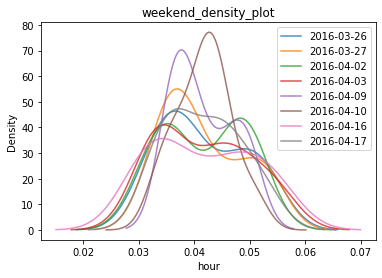

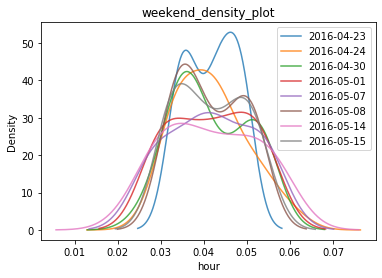

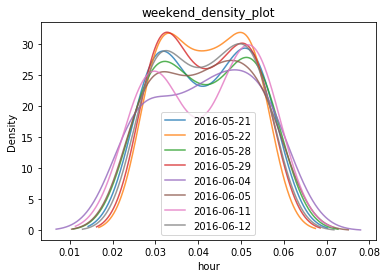

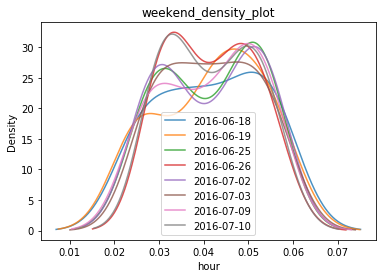

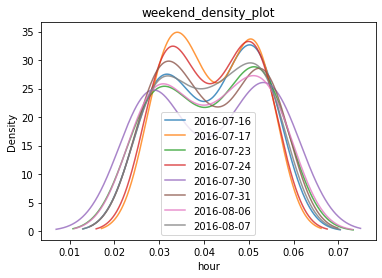

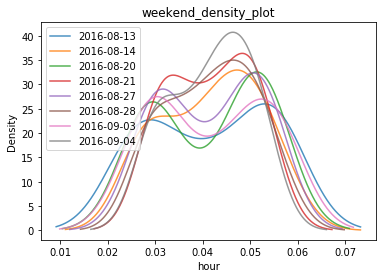

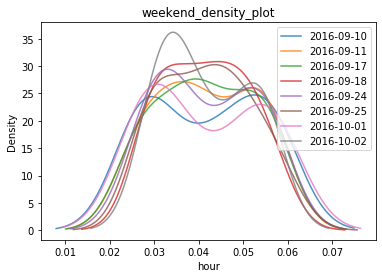

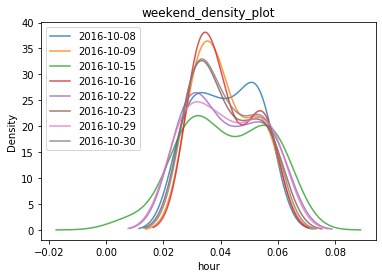

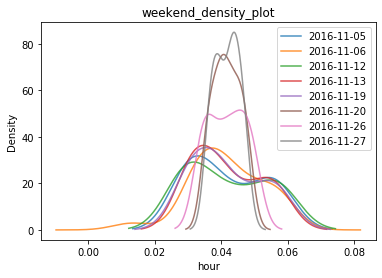

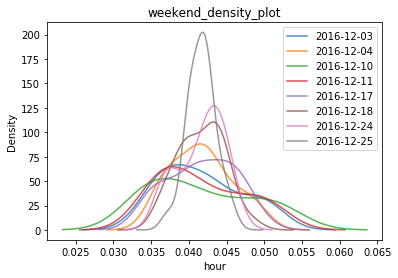

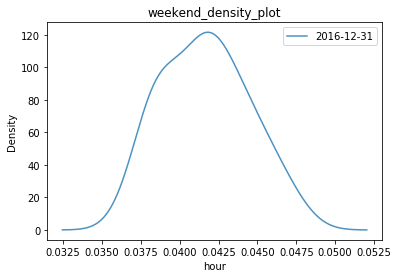

In [170]:
for i in np.arange(1,15) : 
        plt.title("weekend_density_plot")
        plt.xlabel("hour")       
        mer[(mer['day_of_week'] == 'Saturday') |(mer['day_of_week'] == 'Sunday')][192*(i-1):192 *i].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
        plt.show()

In [0]:
import numpy as np

In [0]:
colors = {'Friday':'red', 'Saturday':'orange', 'Sunday':'yellow', 'Monday':'green', 'Tuesday':'blue', 'Wednesday':'violet', 'Thursday' :'pink'}


In [0]:
colors2 ={'red' : 'Friday', 'orange' : 'Saturday', 'yellow' : 'Sunday', 'green' : 'Monday', 'blue':'Tuesday', 'violet' : 'Wednesday', 'pink' : 'Thursday'}

In [99]:
mer.head()

,timestamp,meter_reading_x,day,day_sum_meter_reading,portion,hour,day_of_week,colors
0,2016-01-01 00:00:00,0.221033,2016-01-01,5.448452,0.040568,00,Friday,red
1,2016-01-01 01:00:00,0.220558,2016-01-01,5.448452,0.040481,01,Friday,red
2,2016-01-01 02:00:00,0.224972,2016-01-01,5.448452,0.041291,02,Friday,red
3,2016-01-01 03:00:00,0.233563,2016-01-01,5.448452,0.042868,03,Friday,red
4,2016-01-01 04:00:00,0.239860,2016-01-01,5.448452,0.044023,04,Friday,red


In [0]:
mer['colors'] = mer['day_of_week'].apply(lambda x : colors[x])